### Linear Regression Analysis of ADR
Here, I combine the weekend and week nights columns into one to avoid collinearity between variables. I created a new column called length of days which shows the number of days the customers spent in the hotel. Then I check if there is a relationship with `adr`.

In [1]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_data = pd.read_csv('hotel_data.csv')
hotel_data.head(1)

,hotel,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,reserved_room,booking_changes,deposit_type,agent,company,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,2015-07-01,0,0,2,0.0,0,1,1,3,0,0,0,0.0,0,0,Check-Out,2015-07-01


In [3]:
# convert categorical variable (numeric) to binary
def to_binary(col_name):
    bin_col = []
    for val in hotel_data[col_name]:
        if val > 0:
            val = 1
        else:
            val = 0
        bin_col.append(val)
        
    return bin_col  

In [4]:
# convert weekend and week nights column to night column. if customers spent the night then 1 else 0
hotel_data['stays_in_weekend_nights'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']
hotel_data['stays_in_weekend_nights'] = to_binary('stays_in_weekend_nights')

# rename weekend and week nights column 
hotel_data.rename(columns = {'stays_in_weekend_nights': 'overnight'}, inplace=True)
hotel_data = hotel_data.drop('stays_in_week_nights', axis=1)
hotel_data.head()

,hotel,arrival_date,overnight,adults,children,babies,meal,reserved_room,booking_changes,deposit_type,agent,company,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,2015-07-01,0,2,0.0,0,1,1,3,0,0,0,0.0,0,0,Check-Out,2015-07-01
1,0,2015-07-01,0,2,0.0,0,1,1,4,0,0,0,0.0,0,0,Check-Out,2015-07-01
2,0,2015-07-01,1,1,0.0,0,1,0,0,0,0,0,75.0,0,0,Check-Out,2015-07-02
3,0,2015-07-01,1,1,0.0,0,1,1,0,0,1,0,75.0,0,0,Check-Out,2015-07-02
4,0,2015-07-01,1,2,0.0,0,1,1,0,0,1,0,98.0,0,1,Check-Out,2015-07-03


In [5]:
# check the data types of each column
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75166 entries, 0 to 75165
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        75166 non-null  int64  
 1   arrival_date                 75166 non-null  object 
 2   overnight                    75166 non-null  int64  
 3   adults                       75166 non-null  int64  
 4   children                     75166 non-null  float64
 5   babies                       75166 non-null  int64  
 6   meal                         75166 non-null  int64  
 7   reserved_room                75166 non-null  int64  
 8   booking_changes              75166 non-null  int64  
 9   deposit_type                 75166 non-null  int64  
 10  agent                        75166 non-null  int64  
 11  company                      75166 non-null  int64  
 12  adr                          75166 non-null  float64
 13  required_car_par

In [6]:
# convert columns to the right data type
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'])
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
hotel_data['children'] = hotel_data['children'].astype(int)

In [7]:
# derive the number of days spent in the hotel
hotel_data['length_of_stay'] = hotel_data['reservation_status_date'] - hotel_data['arrival_date']
hotel_data['length_of_stay'] = hotel_data['length_of_stay'].dt.days.astype(int)
hotel_data.head()

,hotel,arrival_date,overnight,adults,children,babies,meal,reserved_room,booking_changes,deposit_type,agent,company,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,length_of_stay
0,0,2015-07-01,0,2,0,0,1,1,3,0,0,0,0.0,0,0,Check-Out,2015-07-01,0
1,0,2015-07-01,0,2,0,0,1,1,4,0,0,0,0.0,0,0,Check-Out,2015-07-01,0
2,0,2015-07-01,1,1,0,0,1,0,0,0,0,0,75.0,0,0,Check-Out,2015-07-02,1
3,0,2015-07-01,1,1,0,0,1,1,0,0,1,0,75.0,0,0,Check-Out,2015-07-02,1
4,0,2015-07-01,1,2,0,0,1,1,0,0,1,0,98.0,0,1,Check-Out,2015-07-03,2


In [8]:
hotel_data.to_csv('hotel_data1.csv', index=False)

In [9]:
# linear correlation of quantitative variables
hotel_data.corr()

,hotel,overnight,adults,children,babies,meal,reserved_room,booking_changes,deposit_type,agent,company,adr,required_car_parking_spaces,total_of_special_requests,length_of_stay
hotel,1.000000,0.031824,-0.004021,-0.007925,-0.036705,0.137801,0.133498,-0.049784,-0.053104,0.151367,-0.056485,0.147908,-0.239655,0.040967,-0.229184
overnight,0.031824,1.000000,0.048233,0.007405,0.002557,0.001319,0.087538,-0.000289,0.005165,0.035552,-0.011384,0.194154,0.023416,0.024022,0.125747
adults,-0.004021,0.048233,1.000000,0.043202,0.028784,0.008867,0.061113,-0.069437,-0.011950,0.242841,-0.302433,0.334175,0.038672,0.204176,0.149573
children,-0.007925,0.007405,0.043202,1.000000,0.025052,0.015282,0.014349,0.047858,-0.010366,0.040554,-0.062032,0.319919,0.075011,0.094490,0.017413
babies,-0.036705,0.002557,0.028784,0.025052,1.000000,-0.005285,-0.011614,0.079817,-0.004964,-0.004218,-0.018451,0.034152,0.034384,0.094595,0.018303
meal,0.137801,0.001319,0.008867,0.015282,-0.005285,1.000000,0.003221,-0.022298,0.005894,0.044506,0.004162,0.014911,0.017790,0.067893,-0.042959
reserved_room,0.133498,0.087538,0.061113,0.014349,-0.011614,0.003221,1.000000,-0.055020,-0.003081,0.101476,-0.091192,0.161389,-0.035661,0.051675,0.119555
booking_changes,-0.049784,-0.000289,-0.069437,0.047858,0.079817,-0.022298,-0.055020,1.000000,0.023385,-0.079427,0.078437,0.013968,0.042575,-0.003353,0.115663
deposit_type,-0.053104,0.005165,-0.011950,-0.010366,-0.004964,0.005894,-0.003081,0.023385,1.000000,-0.070124,0.093641,-0.030271,-0.000608,-0.043033,-0.009629
agent,0.151367,0.035552,0.242841,0.040554,-0.004218,0.044506,0.101476,-0.079427,-0.070124,1.000000,-0.614124,0.169269,-0.089837,0.152273,0.162946


`adr` seems to have correlation with `adults`, `children` and `special requests`. It is not correlated with length of stay.

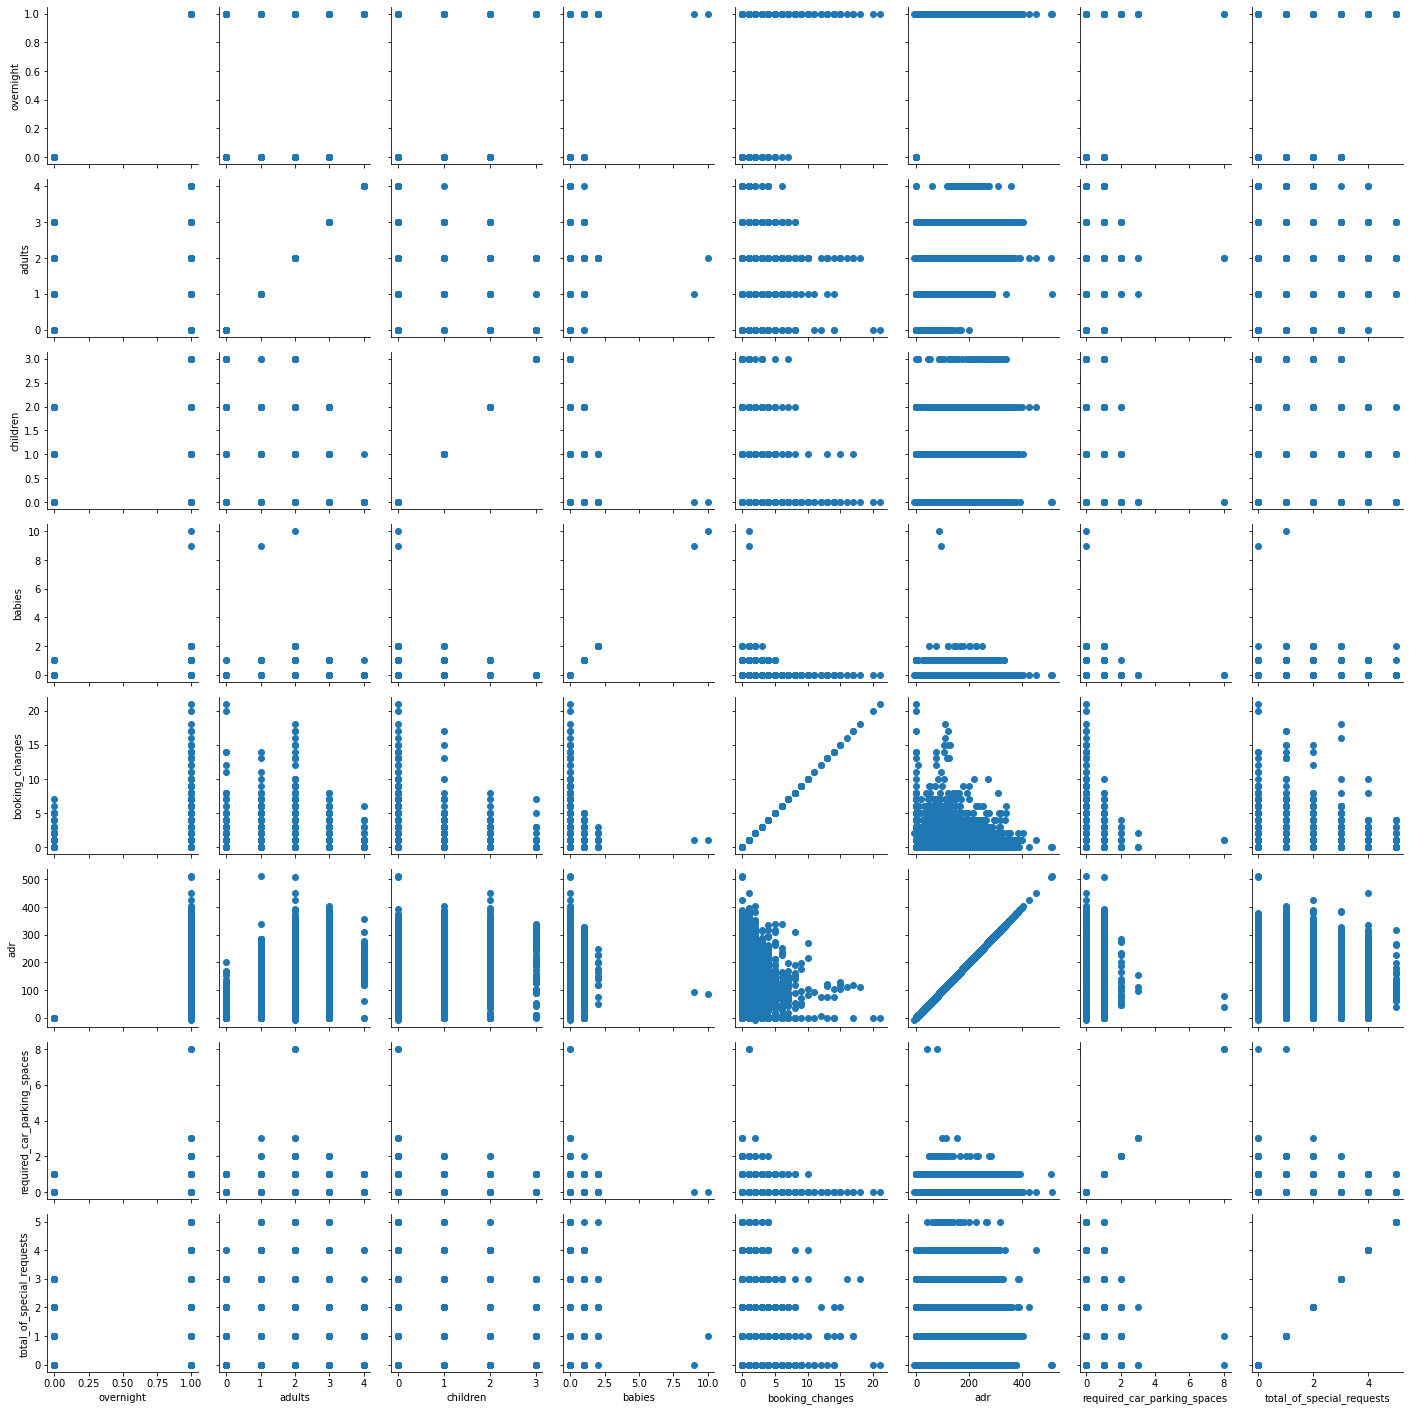

In [10]:
# check for linearity with a scatter plot
qty_vars = ['overnight', 'adults', 'children', 'babies',
                             'booking_changes','adr', 'required_car_parking_spaces', 'total_of_special_requests']
fig = sns.PairGrid(data=hotel_data, vars=qty_vars)
fig.map(plt.scatter)
plt.show()

The scatterplot shows no interesting trend

In [11]:
# define independent and dependent variables
y = hotel_data['adr']
x1 = hotel_data.drop(['reservation_status','reservation_status_date','arrival_date','adr'], axis=1)
x = sm.add_constant(x1)

In [12]:
# model 1 - all quantitative data including binary data
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2250.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:36:54   Log-Likelihood:            -3.8635e+05
No. Observations:               75166   AIC:                         7.727e+05
Df Residuals:                   75151   BIC:                         7.729e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -49.5011      2.193    -22.573      0.000     -53.799     -45.203
hotel                          14.7336      0.343     42.944      0.000      14.061      15.406
overnight                      83.8595      1.613     51.986      0.000      80.698      87.021
adults                         25.4247      0.318     79.927      0.000      24.801      26.048
children                       35.7681      0.389     91.871      0.000      35.005      36.531
babies                          3.5775      1.345      2.659      0.008       0.941       6.215
meal                           -9.7132      1.419     -6.847      0.000     -12.494      -6.933
reserved_room                  12.7441      0.397     32.115      0.000      11.966      13.522
booking_changes                 2.3056      0.209     11.022      0.000       1.896       2.716
deposit_type                   -5.4092      2.815     -1.922      0.055     -10.926       0.108
agent                           1.4711      0.532      2.763      0.006       0.428       2.515
company                       -12.3631      0.747    -16.555      0.000     -13.827     -10.899
required_car_parking_spaces    14.1011      0.519     27.156      0.000      13.083      15.119
total_of_special_requests       6.5339      0.188     34.733      0.000       6.165       6.903
length_of_stay                 -0.2000      0.064     -3.137      0.002      -0.325      -0.075
==============================================================================
Omnibus:                    14158.471   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38378.748
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                       5.849   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model is better than the previous because the Rsquared value is greater even though they have the same number of varibales. The coefficeints of all independent variables are significantly different from zero.